In [1]:
import os
%pwd

'/home/jupyter'

In [2]:
os.chdir("./crisp/")

In [3]:
import os
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import randint, bernoulli
from sklearn import linear_model
from synthetic.facebook_synthetic_data_generator import generator_example

In [4]:
data_path = 'data/synthetic'
if not os.path.exists(data_path):
    os.makedirs(data_path)

In [5]:
n_example = 4
dim_inv=2
dim_spu=2
n_exp=int(1e3)
n_env=2 
save_dir= data_path
test=False 

In [6]:
generator_example(n_example, dim_inv, dim_spu, n_exp, n_env ,save_dir, test)

Environments variables: {'E0': 0.1, 'E1': 1.5}
torch.Size([500, 1])
torch.Size([500, 1])
Generated Synthetic Data according to the Facebook setup Example: 4


In [7]:
data_name = "data_fb_example_%s_dim_inv_%s_dim_spu_%s_n_exp_%s_n_env_%s_test_%s.pickle" %(n_example, dim_inv, dim_spu, n_exp, n_env,test)
df_train = pd.read_pickle(os.path.join(data_path, data_name))
# df_test = pd.read_pickle(os.path.join(result_path,"data_fb_example_1_dim_inv_5_dim_spu_5_n_exp_1000000_n_env_2_test_True.pickle"))

In [8]:
df_train

Causal_0  Causal_1  Non_causal_0  Non_causal_1   Target2  env_split  \
0   -0.008853  0.052388      1.003109     -0.313754  0.103934        0.0   
1   -0.066587  0.085038     -0.917788      0.587240  0.089521        0.0   
2   -0.135265 -0.169593     -1.196774      1.793573  0.012417        0.0   
3    0.056665  0.079351     -0.408474      0.333977  0.008220        0.0   
4   -0.019318 -0.030896      0.149975     -0.124695  0.113328        0.0   
..        ...       ...           ...           ...       ...        ...   
995 -0.151077  0.231135      2.294613      0.765272  0.955347        1.0   
996 -0.724789  2.348882      0.574473     -1.280307  1.412115        1.0   
997 -1.398410  0.470729     -0.531274      1.798105 -2.451027        1.0   
998 -0.658674 -0.617791     -0.739401     -0.594721  0.046451        1.0   
999 -1.232692 -2.527533      0.165788     -0.656260  0.934282        1.0   

     Subj_ID    Target  
0        0.0  0.051519  
1        1.0 -0.204988  
2        2.0  0.104118  
3        3.0  0.077638  
4        4.0  0.035946  
..       ...       ...  
995    995.0 -3.361461  
996    996.0 -1.878710  
997    997.0 -1.166468  
998    998.0  0.684444  
999    999.0 -2.142639  

[1000 rows x 8 columns]

In [25]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

# Implementing the Crisp Codes

In [40]:
configuration = {
    "name": "Example Experiment for AH casual ensemble",
    "short_name": "ah_experiment_notebook",
    "bucket_project": "fdl-us-astronaut-health",
    "bucket_name": "ah_21_data",
    "bucket_path": "gs://ah_21_data",
    "verbose": 1,
    "test_val_split": [0.1, 0.1],
    "per_variant_experiment": False,
    "data_options": {
        'dataset_fp': os.path.join(data_path, data_name),#'results/synthetic/' + data_name,
        'subject_keys': 'Subj_ID',
        'targets': ['Target'],
        'predictors': 'All',
        'environments': ['env_split'],
        'exclude': ['Subj_ID']
    },
    "feature_selection_options": {
        "max_features": 20,
        "verbose": 0,
        "seed": 12
    },
    "ensemble_options": {
        "models": ["ERM"]#, "RF", "ICP", "IRM", "DCF", "ITE", "LIRM", "NLICP"]
    },
    "use_cloud":False,
    "results_directory": "crisp/results/"
}


In [31]:
from main import run as runcrisp

In [39]:
data_path

'data/synthetic'

Running a per sample experiment
Loaded  2  train environments
Env  0  has  417  samples
X shape  (417, 2)  y shape  (417, 1)
Env  1  has  393  samples
X shape  (393, 2)  y shape  (393, 1)
Loaded val set, X shape: (90, 2)  y shape:  (90, 1)
Loaded test set, X shape: (100, 2)  y shape:  (100, 1)
Running Ensemble with the following models:  ['ERM']
Checking for features with zero variance
Across all environments the following columns had zero variance: []
Running a per sample experiment


/home/jupyter/crisp/utils/CorrelationToTarget.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  all_x = np.array(all_x)
/home/jupyter/crisp/utils/CorrelationToTarget.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  all_y = np.array(all_y)


Loaded  2  train environments
Env  0  has  417  samples
X shape  (417, 2)  y shape  (417, 1)
Env  1  has  393  samples
X shape  (393, 2)  y shape  (393, 1)
Loaded val set, X shape: (90, 2)  y shape:  (90, 1)
Loaded test set, X shape: (100, 2)  y shape:  (100, 1)
Running correlation analysis
Running a per sample experiment
Loaded  2  train environments
Env  0  has  417  samples
X shape  (417, 2)  y shape  (417, 1)
Env  1  has  393  samples
X shape  (393, 2)  y shape  (393, 1)
Loaded val set, X shape: (90, 2)  y shape:  (90, 1)
Loaded test set, X shape: (100, 2)  y shape:  (100, 1)
Running Non-Causal Linear ERM Baseline
{'test_acc': 0.019999999552965164, 'test_nll': 0.2581358850002289, 'test_probs': array([0.41259974, 0.4672413 , 0.53067845, 0.5656113 , 0.43314034,
       0.4228297 , 0.4983057 , 0.58823305, 0.54786706, 0.4194309 ,
       0.30387974, 0.49256197, 0.62536126, 0.5973141 , 0.62037903,
       0.47846603, 0.55186015, 0.47466594, 0.5575868 , 0.5867111 ,
       0.56486225, 0.4496

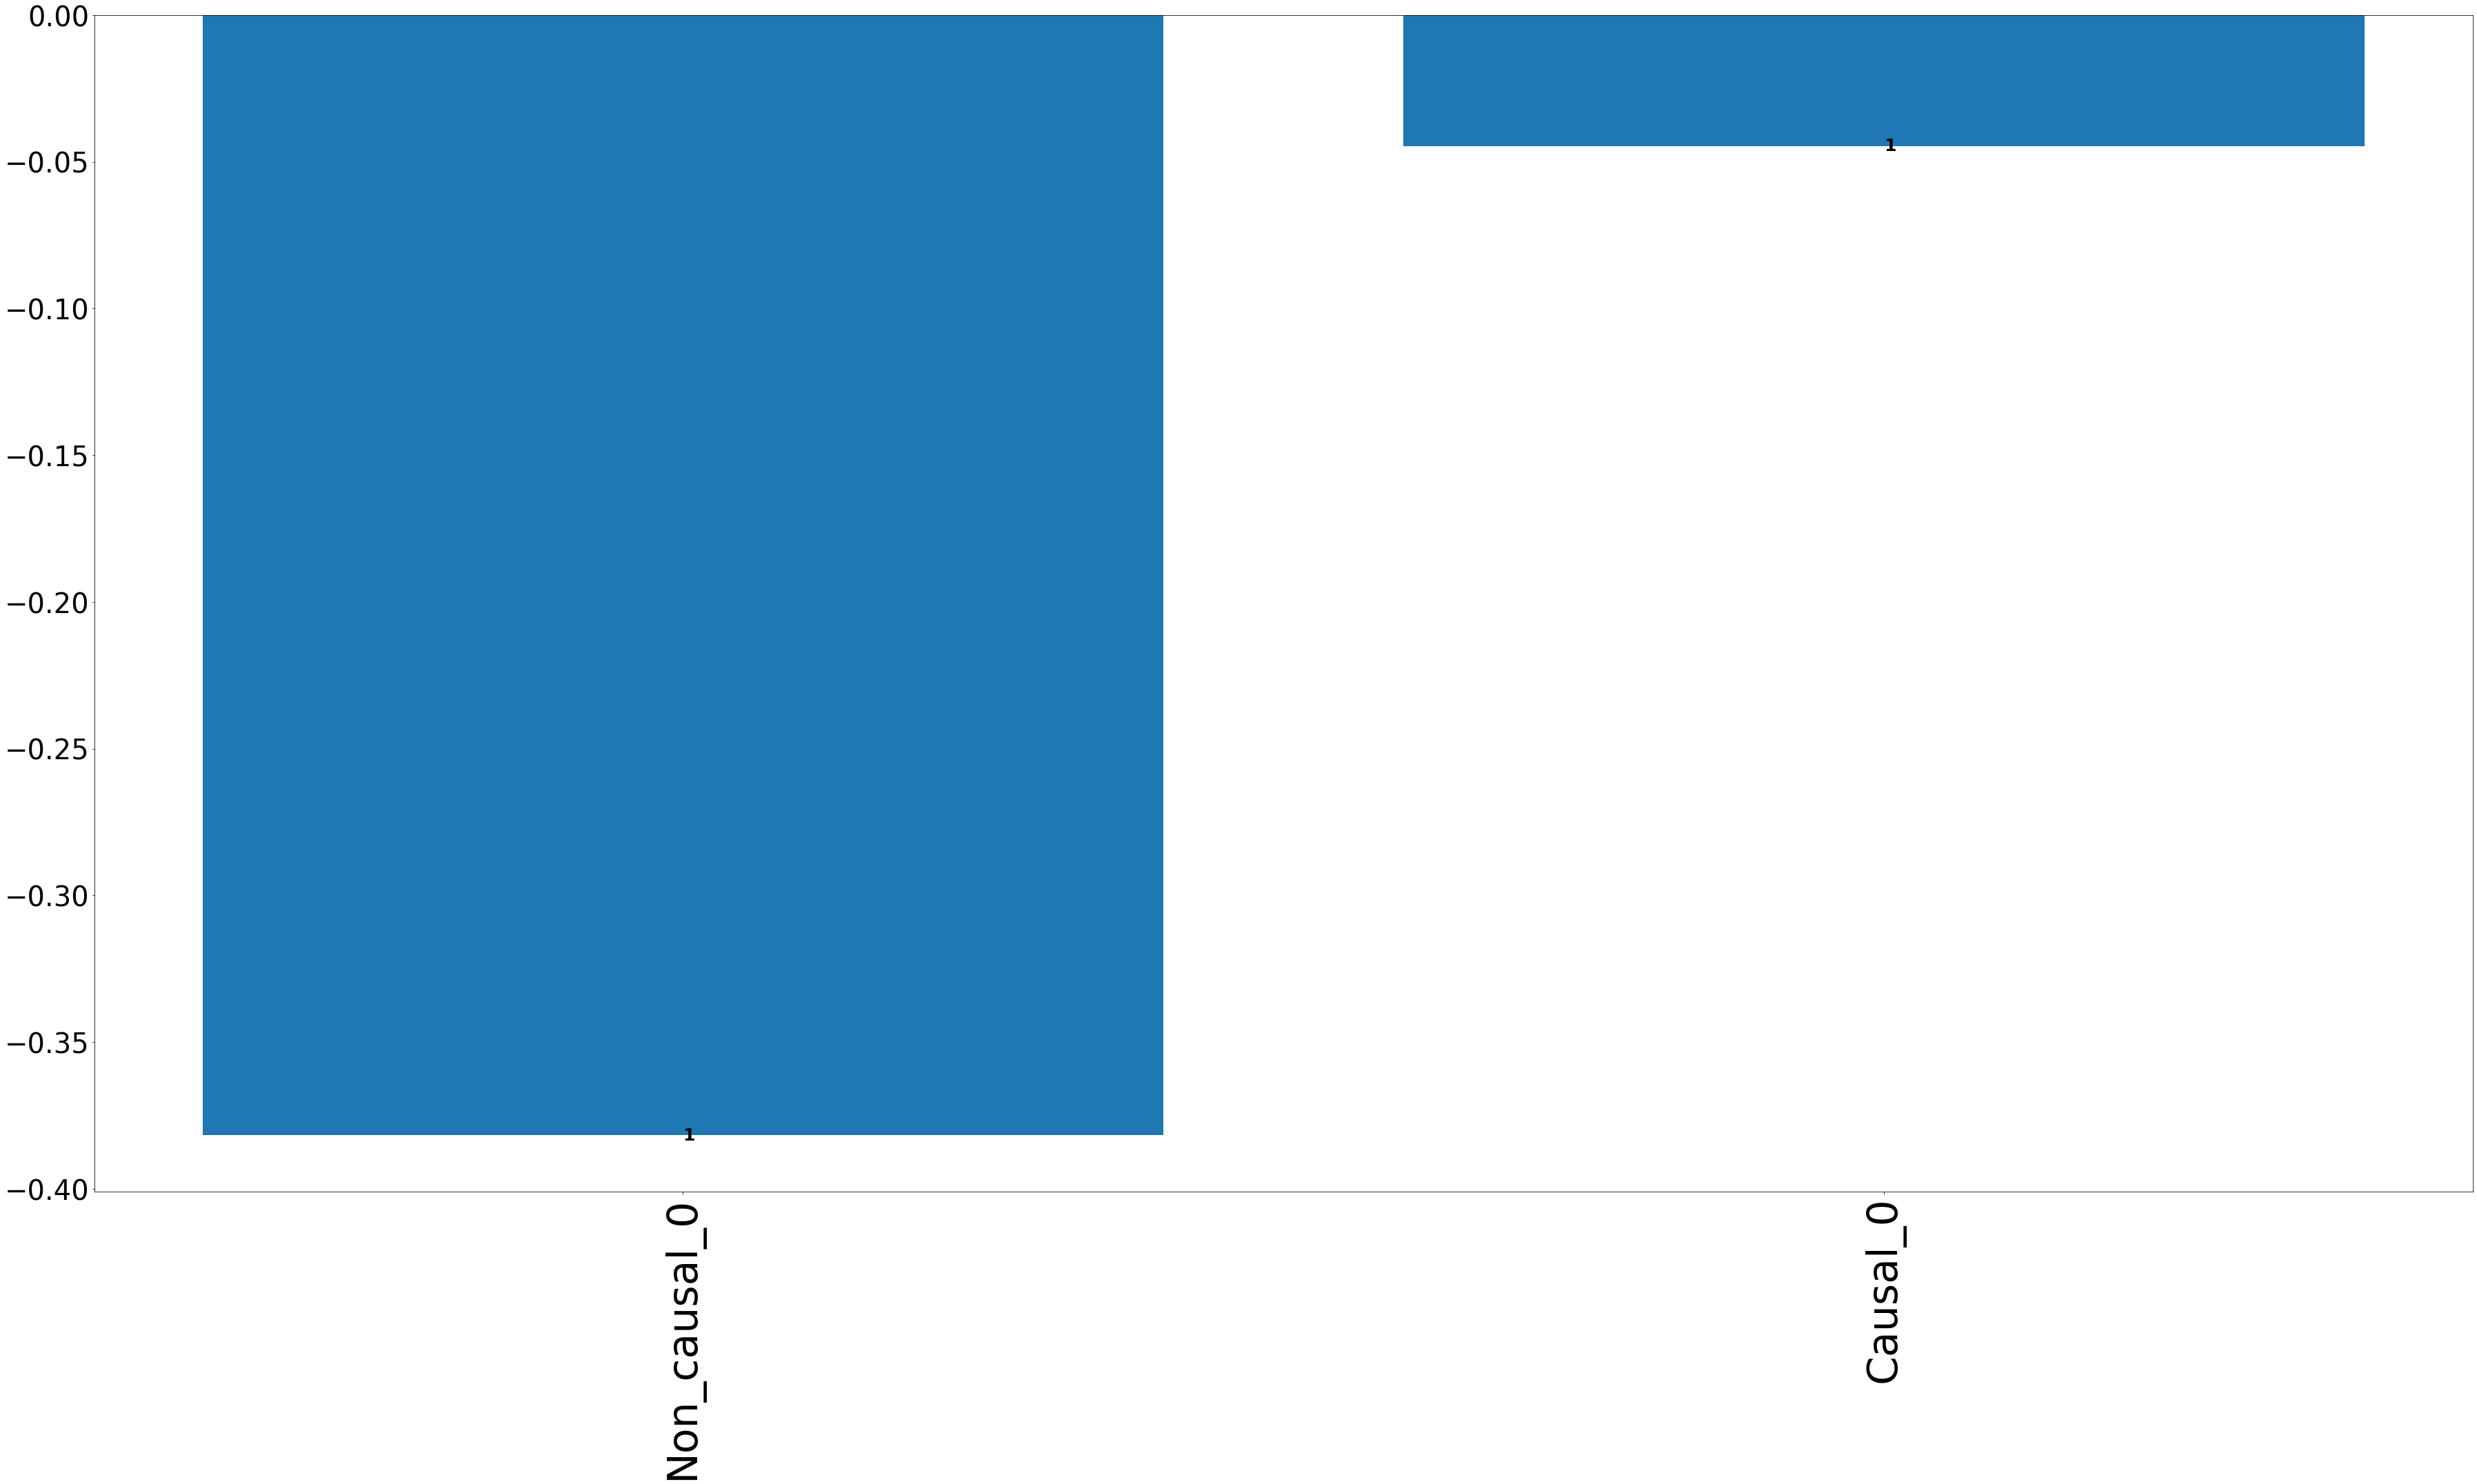

In [41]:
runcrisp(configuration)

# Causal variable: 


In [10]:
sns.scatterplot(x="Causal_0", y="Target", data=df_train, hue="env_split", s=15)
reg = linear_model.LinearRegression().fit(df_train[['Causal_0']], df_train["Target"])
print("Reg cooefs:", reg.coef_, reg.intercept_)
abline(reg.coef_, reg.intercept_)

Reg cooefs: [1.50949738] -0.010940230485956617


## env = 0

Reg cooefs: [1.60684659] 0.002277184872372221


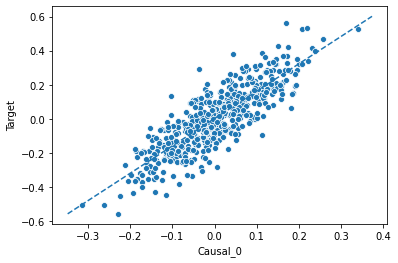

In [11]:
sns.scatterplot(x="Causal_0", y="Target", data=df_train[df_train["env_split"]==0])
reg = linear_model.LinearRegression().fit(df_train[df_train["env_split"]==0][['Causal_0']], df_train[df_train["env_split"]==0]["Target"])
print("Reg cooefs:", reg.coef_, reg.intercept_)
abline(reg.coef_, reg.intercept_)

## env = 1

In [12]:
sns.scatterplot(x="Causal_0", y="Target", data=df_train[df_train["env_split"]==1])
reg = linear_model.LinearRegression().fit(df_train[df_train["env_split"]==1][['Causal_0']], df_train[df_train["env_split"]==1]["Target"])
print("Reg cooefs:", reg.coef_, reg.intercept_)
abline(reg.coef_, reg.intercept_)

Reg cooefs: [1.508297] -0.02469241988591586


# Non causal var

In [13]:
sns.scatterplot(x="Non_causal_0", y="Target", data=df_train, hue="env_split", s=15)
reg = linear_model.LinearRegression().fit(df_train[['Non_causal_0']], df_train["Target"])
print("Reg cooefs:", reg.coef_, reg.intercept_)
abline(reg.coef_, reg.intercept_)


Reg cooefs: [-0.77898428] -0.08618886616433315


#

Reg cooefs: [-0.00415771] 0.00897351034559709


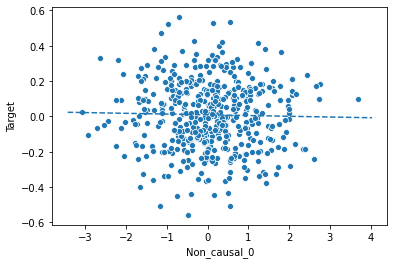

In [14]:
sns.scatterplot(x="Non_causal_0", y="Target", data=df_train[df_train["env_split"]==0])
reg = linear_model.LinearRegression().fit(df_train[df_train["env_split"]==0][['Non_causal_0']], df_train[df_train["env_split"]==0]["Target"])
print("Reg cooefs:", reg.coef_, reg.intercept_)
abline(reg.coef_, reg.intercept_)


## env = 1

In [15]:
sns.scatterplot(x="Non_causal_0", y="Target", data=df_train[df_train["env_split"]==1])
reg = linear_model.LinearRegression().fit(df_train[df_train["env_split"]==1][['Non_causal_0']], df_train[df_train["env_split"]==1]["Target"])
print("Reg cooefs:", reg.coef_, reg.intercept_)
abline(reg.coef_, reg.intercept_)

Reg cooefs: [-1.28960769] -0.23927604563424387


In [16]:
df_train['Causal_0'].hist(by=df_train['env_split'])
df_train['Non_causal_0'].hist(by=df_train['env_split'])
df_train['Target'].hist(by=df_train['env_split'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd12d799580>,
      dtype=object)

## Two dimensional regression